In [72]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib as plt
import pandas as pd
df=pd.read_csv("spam.csv",encoding='latin-1')
df=df[['v1','v2']]
df.head(20)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


<h3>2. Clean the data</h3>


In [73]:
wanted_string = "abcdefghijklmnopqrstuvwxyz "
wanted_list = list(wanted_string)
for j in range(len(df.index)):
    new = ""
    for i in df['v2'].iloc[j]:
        i=i.lower()
        if i in wanted_list:
            new+=i
    df['v2'].iloc[j]=new
clean = df
clean.head(20)

,v1,v2
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
5,spam,freemsg hey there darling its been weeks now ...
6,ham,even my brother is not like to speak with me t...
7,ham,as per your request melle melle oru minnaminun...
8,spam,winner as a valued network customer you have b...
9,spam,had your mobile months or more u r entitled t...


<h3>3. Split the Data</h3>


In [74]:
train_data = clean.head(int(len(clean.index)*0.75))
test_data = clean.tail(int(len(clean.index)*0.25))


<h3>4. Create a Word Frequency DataFrame</h3>



In [75]:
clean_spam = train_data.query("v1=='spam'")
clean_ham = train_data.query("v1=='ham'")
spam_dict = dict()
ham_dict = dict()
for lines in clean_spam['v2']:
    for word in lines.split():
        if word not in spam_dict:
            spam_dict[word]=1
        else:
            spam_dict[word]+=1
for line in clean_ham['v2']:
    for word in line.split():
        if word not in ham_dict:
            ham_dict[word]=1
        else:
            ham_dict[word]+=1
    
spam_dataframe = pd.DataFrame.from_dict(spam_dict,orient='index')
ham_dataframe = pd.DataFrame.from_dict(ham_dict,orient='index')
word_frequency = pd.concat([spam_dataframe,ham_dataframe],axis=1)
word_frequency.to_csv("wordf.csv")
word_frequency = pd.read_csv('wordf.csv')
word_frequency.columns = ['Word','Spam','Ham']
word_frequency = word_frequency.fillna(0)
word_frequency['Spam'] = word_frequency['Spam'].astype(int)
word_frequency['Ham'] = word_frequency['Ham'].astype(int)
word_frequency.head(10)

,Word,Spam,Ham
0,free,169,43
1,entry,21,0
2,in,58,608
3,a,284,801
4,wkly,9,0
5,comp,7,0
6,to,529,1161
7,win,49,9
8,fa,4,0
9,cup,5,2


<h3>5. Visualise the Data</h3>


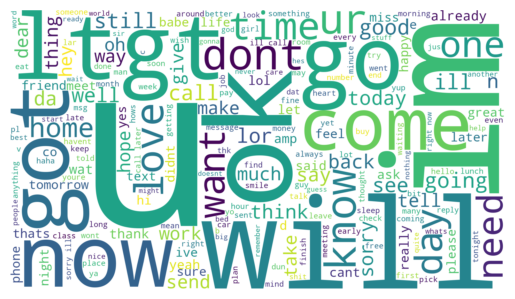

In [76]:
clean_ham=[x[1] for x in clean_ham.values]
clean_spam=[x[1] for x in clean_spam.values]
word1=" ".join(x for x in clean_ham)
word2=" ".join(x for x in clean_spam)
wordcloud = WordCloud(background_color = "white",width=1920,height=1080,stopwords=STOPWORDS).generate(word1)
plt.pyplot.imshow(wordcloud, interpolation='bilinear')
plt.pyplot.axis("off")
plt.pyplot.show()

<h3>6.  Calculate  Posterior Probabilities</h3>







In [77]:
def s_pos(number_spam,total_spam):
    k=0.5
    return (number_spam+k)/(total_spam+2*k)
dic_pos = {}
dic_neg={}
for index, row in word_frequency.iterrows():
    dic_pos[row['Word']]=s_pos(row['Spam'],word_frequency['Spam'].sum())
    dic_neg[row['Word']]=s_pos(row['Ham'],word_frequency['Ham'].sum())
pos_dataframe = pd.DataFrame.from_dict(dic_pos,orient='index')
neg_dataframe = pd.DataFrame.from_dict(dic_neg,orient='index')
word_prob = pd.concat([pos_dataframe,neg_dataframe],axis=1)
word_prob.to_csv("wordf1.csv")
word_prob = pd.read_csv('wordf1.csv')
word_prob.columns = ['Word','P(E|S)','P(E|-S)']
word_prob = word_prob.fillna(0)
word_prob    
    


,Word,P(E|S),P(E|-S)
0,free,0.014119,0.000872
1,entry,0.001791,0.000010
2,in,0.004873,0.012195
3,a,0.023698,0.016063
4,wkly,0.000791,0.000010
...,...,...,...
7296,teeth,0.000042,0.000030
7297,hidden,0.000042,0.000030
7298,royal,0.000042,0.000030
7299,tog,0.000042,0.000030


<h3>7. Checking the 'spamliness' of a single word</h3>


In [78]:
def s_e_pos(p_e_s,p_e_ns):
    p_s = word_frequency['Spam'].sum()/(word_frequency['Spam'].sum()+word_frequency['Ham'].sum())
    p_ns = word_frequency['Ham'].sum()/(word_frequency['Spam'].sum()+word_frequency['Ham'].sum())
    return (p_e_s*p_s)/(p_e_s*p_s + p_e_ns*p_ns)
p_s_e= []
p_ns_e = []
for i,row in word_prob.iterrows():
    p_s_e.append(s_e_pos(row['P(E|S)'],row['P(E|-S)']))
    p_ns_e.append(1- s_e_pos(row['P(E|S)'],row['P(E|-S)']))
word_prob['P(S|E)']=p_s_e
word_prob['P(S|-E)']=p_ns_e
word_prob.head(2)

,Word,P(E|S),P(E|-S),P(S|E),P(S|-E)
0,free,0.014119,0.000872,0.795764,0.204236
1,entry,0.001791,0.000010,0.977271,0.022729


<h3>8. Checking the 'spamliness' of several words</h3>


In [ ]:
message = "free entry"
message_to_test = message.split()
prob_spam = []
prob_not_spam = []
word_prob_list = word_prob['Word'].tolist()
for word in message_to_test:
    if word not in word_prob_list:
        continue
    else:
        selected_row = word_prob[word_prob['Word']==word]
        prob_spam.append(selected_row.iloc[0,1])
        prob_not_spam.append(selected_row.iloc[0,2])
p_x_s = 1
p_x_ns = 1
for num in prob_spam:
    p_x_s = p_x_s*num
for num in prob_not_spam:
    p_x_ns = p_x_ns*num


p_s=word_frequency['Spam'].sum()/(word_frequency['Spam'].sum()+word_frequency['Ham'].sum())
p_ns=word_frequency['Ham'].sum()/(word_frequency['Spam'].sum()+word_frequency['Ham'].sum())


prob_of_spam = (p_s*p_x_s)/(p_s*p_x_s+p_ns*p_x_ns)
prob_of_not_spam = (p_ns*p_x_ns)/(p_s*p_x_s+p_ns*p_x_ns)
print('Message:',message)
print('Probability of Spam:',prob_of_spam)
print('Probability of Not Spam',prob_of_not_spam)

Message: free entry
Probability of Spam: 0.9985659913311586
Probability of Not Spam 0.001434008668841427


<h3>9. Avoiding floating point underflow</h3>


<p>Multiplying a set of small probabilities could result in a floating-point error.  This is where the product becomes too small to be represented correctly.  To avoid this we can take the logarithm of the probabilities and add them.  

To avoid multiplication of small numbers, we use the following property of $\log(x):$</p>
$$
\log(a\cdot b)=\log(a)+\log(b)
$$
<p>i.e. the log of the product is equal to the sum of logs (so instead of multiplying small numbers we will add them):</p>


In [80]:
import math
p_s_log = math.log(word_frequency['Spam'].sum()/(word_frequency['Spam'].sum()+word_frequency['Ham'].sum()))
p_ns_log= math.log(word_frequency['Ham'].sum()/(word_frequency['Spam'].sum()+word_frequency['Ham'].sum()))
for prob in prob_spam:
    p_s_log+=math.log(prob)
for prob in prob_not_spam:
    p_ns_log+=math.log(prob)
print(p_s_log)
print(p_ns_log)

-12.225515252249714
-18.771361706012232


<h3>10. Testing the Model</h3>



In [81]:
match_spam = 0
match_ham = 0
thought_ham_is_spam = 0
thought_spam_is_ham = 0
for index,message in test_data.iterrows():
    message_to_test = message['v2'].split()
    prob_spam = []
    prob_not_spam = []
    word_prob_list = word_prob['Word'].tolist()
    for word in message_to_test:
        if word not in word_prob_list:
            continue
        else:
            selected_row = word_prob[word_prob['Word']==word]
            prob_spam.append(selected_row.iloc[0,1])
            prob_not_spam.append(selected_row.iloc[0,2])
    p_s_log = math.log(word_frequency['Spam'].sum()/(word_frequency['Spam'].sum()+word_frequency['Ham'].sum()))
    p_ns_log= math.log(word_frequency['Ham'].sum()/(word_frequency['Spam'].sum()+word_frequency['Ham'].sum()))
    for prob in prob_spam:
        p_s_log+=math.log(prob)
    for prob in prob_not_spam:
        p_ns_log+=math.log(prob)
    if message['v1']=='ham':
        if p_ns_log > p_s_log:
            match_ham+=1
        elif p_ns_log < p_s_log:
            thought_ham_is_spam +=1
    elif message['v1']=='spam':
        if p_ns_log>p_s_log:
            thought_spam_is_ham+=1
        elif p_ns_log<p_s_log:
            match_spam+=1
accuracy = (match_ham + match_spam)/(match_ham+match_spam+thought_ham_is_spam+thought_spam_is_ham)

In [82]:
print("match_spam "+str(match_spam))
print("match_ham "+str(match_ham))
print("thought_ham_is_spam "+str(thought_ham_is_spam))
print("thought_spam_is_ham "+str(thought_spam_is_ham))
print("Accuracy "+str(accuracy))

match_spam 174
match_ham 1186
thought_ham_is_spam 25
thought_spam_is_ham 8
Accuracy 0.9763101220387652


<h3></h3>